In [38]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#show all picutures in images folder
from IPython.display import Image
import os

#import classification libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

%matplotlib inline

#Importing the dataset

Original Image 


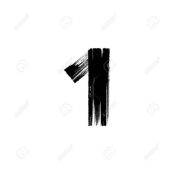

Resized Image 


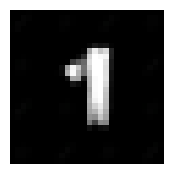

In [39]:
from PIL import Image

#import image
im = Image.open('images/DD_oneA.png')
im
#show im in size figure size 2x2
print("Original Image " )
plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(im)
plt.show()

print("Resized Image " )
plt.figure(figsize=(2,2))
plt.axis('off')
im = im.resize((28,28))
im = np.array(im)
im = 255 - im
plt.imshow(im)
plt.show()


In [40]:
directory = "images"

#save im as a 28*28 pixel image
# im = im.resize((28,28))
# pixels = list(im.getdata())

handImagesDF = pd.DataFrame()

#use for loop to show all pictures in images folder
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
   
    # checking if it is a file
    if os.path.isfile(f):
        im = Image.open(f)
        im = im.resize((28,28))
        #store pixel of im into a handImagesDF dataframe with 784 pixel columns
        im = im.convert('L')
        pixels = list(im.getdata())

        #store pixel into row in handImagesDF
        handImagesDF = handImagesDF.append(pd.DataFrame(pixels).T, ignore_index=True)

/var/folders/yz/dbsffj116_9fn832qjltn9g00000gn/T/ipykernel_16534/3554963020.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  handImagesDF = handImagesDF.append(pd.DataFrame(pixels).T, ignore_index=True)


In [41]:
#add prefix "pixel" to each column name
handImagesDF.columns = ["pixel" + str(i) for i in range(784)]
handImagesDF

#subtract 255 from each pixel value
handImagesDF = 255 - handImagesDF

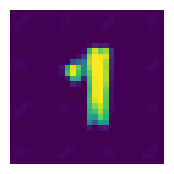

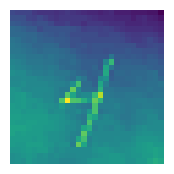

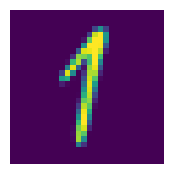

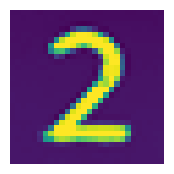

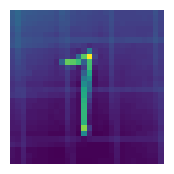

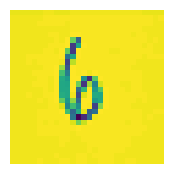

In [42]:
#for i pixelsDF, show all images
for i in range(0, len(handImagesDF)):
    #fig size
    plt.figure(figsize=(2,2))
    #hide axis and ticks labels
    plt.axis('off')
    
    # plt.imshow(handImagesDF.iloc[i].values.reshape(28,28), cmap='gray')
    # plt.show()
    plt.imshow(handImagesDF.iloc[i].values.reshape(28,28))
    plt.show()    

In [43]:
# python show 

# #show images by side, both original and resized
# fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# #hide axis and ticks labels for all subplots, add a box around each image
# for a in ax:
#     a.axis('off')
#     a.set_aspect('equal')
# ax[0].imshow(im)

# ax[0].set_title('Original Image', fontsize=20, fontweight='bold')

# ax[1].imshow(im.resize((28,28)))
# ax[1].set_title('Pixelated Image',  fontsize=20, fontweight='bold')
# plt.show()

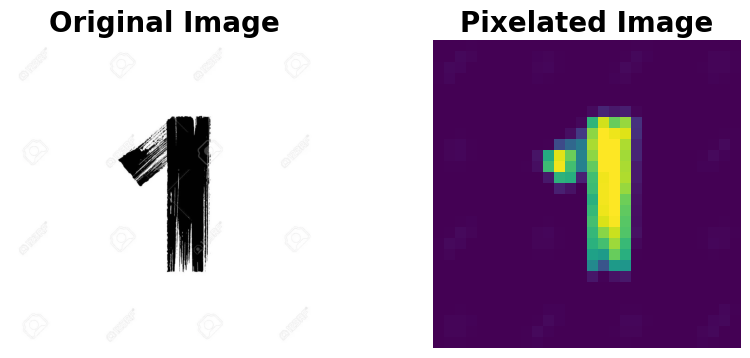

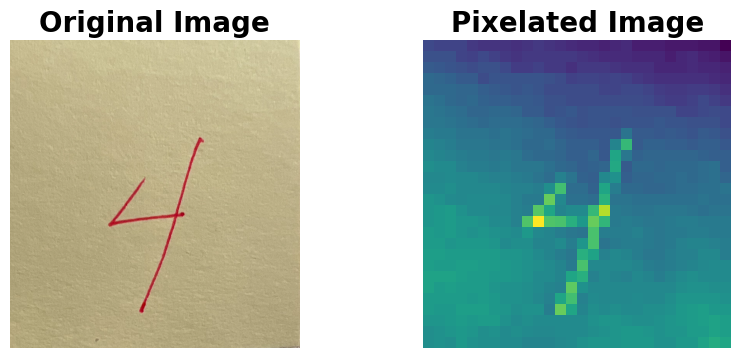

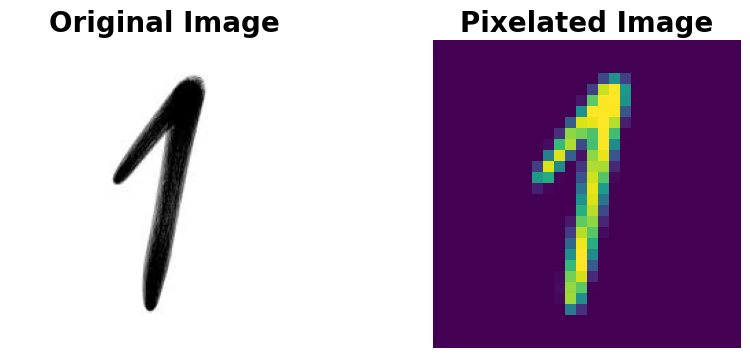

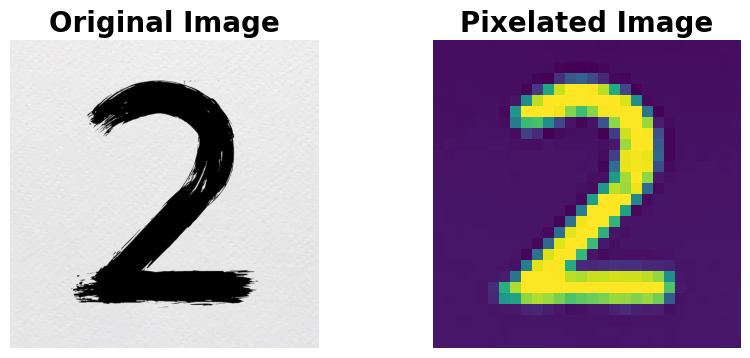

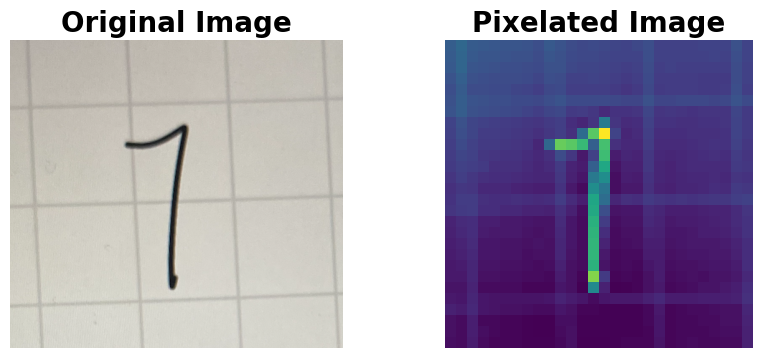

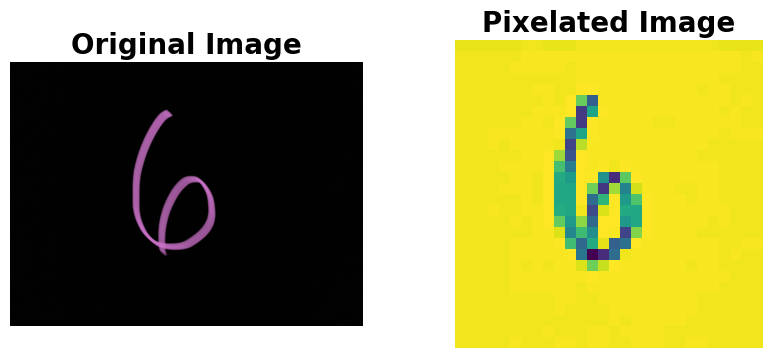

In [44]:
# for row,  filename in  handImagesDF.iterrows(), os.listdir(directory):

# for filename in os.listdir(directory):
#     f = os.path.join(directory, filename)

for element in range(len(handImagesDF)):
    #get os.listdir(directory) element
    filename = os.listdir(directory)[element]
    f = os.path.join(directory, filename)

    #get handImagesDF element
    row = handImagesDF.iloc[element]
   
    # checking if it is a file
    if os.path.isfile(f):
        original = Image.open(f)
        # im = im.resize((28,28))
    
    #show images of  both original and resized side by side
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    #hide axis and ticks labels for all subplots, add a box around each image
    for a in ax:
        a.axis('off')
        a.set_aspect('equal')
    
    ax[0].imshow(original)
    ax[0].set_title('Original Image', fontsize=20, fontweight='bold')

    ax[1].imshow(row.values.reshape(28,28))
    ax[1].set_title('Pixelated Image',  fontsize=20, fontweight='bold')
    plt.show()

    # #add 3 mtext to the right of each set of images, in green and on figure area
    # fig.text(0.9, 0.5, filename, color='green', fontsize=20, fontweight='bold', ha='center', va='center', rotation='vertical')
    # plt.show()
    # fig.text(0.9, 0.5, filename, color='green', fontsize=20, fontweight='bold', ha='center', va='center', rotation='vertical')
    # plt.show()
    # fig.text(0.9, 0.5, filename, color='green', fontsize=20, fontweight='bold', ha='center', va='center', rotation='vertical')
    # plt.show()

    # fig.text(0.5, 0.5, filename, ha='center', va='center', fontsize=20, fontweight='bold')
    # fig.text(0.5, 0.5, 'Original Image', ha='center', va='center', fontsize=20, fontweight='bold')
    # fig.text(0.5, 0.5, 'Resized Image', ha='center', va='center', fontsize=20, fontweight='bold')
    # fig, ax = plt.subplots(1, 3, figsize=(10, 4))
    # #hide axis and ticks labels for all subplots, add a box around each image
    # for a in ax:
    #     a.axis('off')
    #     a.set_aspect('equal')
    # ax[0].text(0.5, 0.5, 'Original Image', fontsize=20, fontweight='bold')
    # ax[1].text(0.5, 0.5, 'Resized Image', fontsize=20, fontweight='bold')
    # ax[2].text(0.5, 0.5, 'Resized Image', fontsize=20, fontweight='bold')
    # plt.show()

In [45]:
data = pd.read_csv('data/train.csv')


In [46]:
#save handImagesDF as a csv file in data folder
handImagesDF.to_csv('data/handImagesDF.csv', index=False)

In [47]:
import joblib 

#load in KNN model, SVM model and Nueral Network model from saved files
knn = joblib.load('models/model_knnFinal.pkl')
svm = joblib.load('models/model_svcFinal.pkl')
# nn = joblib.load('models/model_nnFinal.pkl')

/Users/aaronamankwaah/miniconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [48]:
#run all 3 models on handImagesDF and save results in a dataframe
#
handImagesDF['knn'] = knn.predict(handImagesDF.iloc[:,0:784])
handImagesDF['svm'] = svm.predict(handImagesDF.iloc[:,0:784])
# handImagesDF['nn'] = nn.predict(handImagesDF)


In [49]:
handImagesDF
#select 1st row of handImagesDF


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,knn,svm
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,1,0,0,9,9
1,68,67,67,67,64,63,63,63,62,63,...,91,89,89,91,91,94,97,95,1,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,19,19,20,20,19,18,19,19,19,19,...,25,24,25,25,25,25,25,25,2,2
4,78,83,77,76,75,74,74,73,71,76,...,42,43,44,43,43,44,44,52,1,5
5,252,252,252,252,252,252,253,253,252,252,...,253,254,254,253,253,253,253,253,0,2


In [50]:
#how can we represent the results of the 3 models with the original images?



In [51]:

#print the accuracy of each model
# print('KNN accuracy: ', accuracy_score(data['label'], handImagesDF['knn']))
# print('SVM accuracy: ', accuracy_score(data['label'], handImagesDF['svm']))
# print('NN accuracy: ', accuracy_score(data['label'], handImagesDF['nn']))

In [52]:
#show predictied values for each model for each image next to the image
# for element in range(len(handImagesDF)):
#     #show image of handImagesDF element
#     row = handImagesDF.iloc[element]
#     im.show(

In [53]:
#give acc